## Setting

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("/content/drive/My Drive/LCNN/")

import os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt



import imp
import importlib
import LCNN
imp.reload(LCNN)
from LCNN import adjust,accuracy,one_hot
#device = torch.device('cuda')
device = torch.device('cpu')




import copy
from IPython.display import HTML, display
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


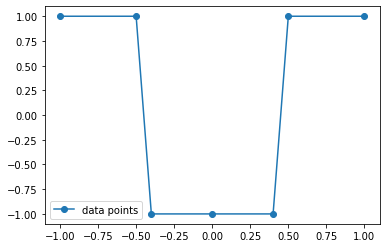

In [4]:
Nmin=-1
Nmax=1
datanumber=7
class MyDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = {'data': float(self.data[idx]), 'label': self.label[idx]}
        return sample

    
def fun(x):
    return np.sin(x*np.pi)


data=np.array([-1,-0.5,-0.4,0,0.4,0.5,1])*1.0
label=-(np.array([0,0,1,1,1,0,0])*2.0-1)

train_data=data
train_label=label

plt.plot(train_data,train_label,'-o',label='data points')
plt.legend()
plt.savefig('data_points.png')

train_loader = torch.utils.data.DataLoader(dataset=MyDataset(train_data,train_label), 
                                           batch_size=datanumber, 
                                           shuffle=False)

device = torch.device('cuda')

In [45]:
# Device configuration
device = torch.device('cuda')
# Hyper-parameters 
input_size = 1

hidden_size1 = 10000

num_classes = 1

NNN=500

class NeuralNet2layer(nn.Module):
    def __init__(self, input_size, hidden_size1,num_classes):
        super(NeuralNet2layer, self).__init__()
        self.input_size = input_size
        self.hidden_size1 = hidden_size1


        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias=False)
        stdv = 1. / np.sqrt(self.hidden_size1)
        print(self.hidden_size1)

        #self.fc1.weight.detach().uniform_(-1, 1)
        #elf.fc1.bias.detach().uniform_(-1, 1)
        #self.fc2.weight.detach().uniform_(-1/np.sqrt(NNN), 1/np.sqrt(NNN))



        self.fc1.weight.detach().normal_(0, 1)
        self.fc1.bias.detach().normal_(0, 1)
        self.fc2.weight.detach().normal_(0, 1/np.sqrt(NNN))


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [53]:
def plot_training(model,node_num=1000):
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')

    
    x= np.linspace(Nmin, Nmax, num=node_num)
    y= np.zeros(node_num)
    with torch.no_grad():
        for i in range(node_num):
            xx=torch.tensor(x[i]).reshape(-1, 1).to(device).float()
            y[i]=model(xx).to(device).cpu().numpy()
    plt.plot(x,y,'-',label=r'$x,f(x)$')
 


def get_line(model,node_num=1000,Nmin=-1, Nmax=1):
    x= np.linspace(Nmin, Nmax, num=node_num)
    y= np.zeros(node_num)
    with torch.no_grad():
        for i in range(node_num):
            xx=torch.tensor(x[i]).reshape(-1, 1).to(device).float()
            y[i]=model(xx).to(device).cpu().numpy()
    return x,y


def modify_init(record_i=1,hidden_size1=20,learning_rate=0.2,epoch=10000,dev=100,gamma=1,init_seed=0):
    # hidden_size1=hidden_size1
    # dev=dev
    # learning_rate=learning_rate
    # beta=beta



    torch.manual_seed(init_seed)
    line=[]
    abc=[]
    device = torch.device('cuda')
    model = NeuralNet2layer(1, hidden_size1,1).to(device)
    traj=[]
    with torch.no_grad():
        model.fc1.weight[record_i][0]=0.5
        model.fc1.bias[record_i]=-0.1
        model.fc2.weight[0][record_i]=0.1/np.sqrt(NNN)
        model.fc1.weight[:]=gamma*model.fc1.weight[:]
        model.fc1.bias[:]=gamma*model.fc1.bias[:]
        model.fc2.weight[:]=gamma*model.fc2.weight[:]

    


    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
    outdis = display(progress(0, 100), display_id=True)
    criterion = nn.MSELoss()

    for i, data in enumerate(train_loader):
        pass
    images = data['data'].reshape(-1, 1).to(device).float()
    labels = data['label'].reshape(-1, 1).to(device).float()
    
    lo=10
    for runsteps in range(epoch):
        #if runsteps==10000 or runsteps==20000 or runsteps==30000:
            #learning_rate = learning_rate * 10
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
            
        if runsteps% dev==0 or lo<0.001:
            outdis.update(progress(outdis.update(progress(100.*runsteps/epoch, 100)), 100))
            

            x=-model.fc1.bias[record_i]/model.fc1.weight[record_i][0].reshape(-1, 1).to(device).float()
            traj.append([x.cpu().detach().numpy(),model(x).cpu().detach().numpy()])

            a=model.fc1.weight[record_i][0].cpu().detach().numpy()
            b=model.fc1.bias[record_i].cpu().detach().numpy()
            c=model.fc2.weight[0][record_i].cpu().detach().numpy()

            abc.append([a,b,c])
            print(runsteps,lo)
        if lo<0.001:
            x,y=get_line(model,node_num=10000)
            line=[x,y]
            print('converged')
            break
    
        outputs = model(images).to(device)
        loss = criterion(outputs, labels).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lo=loss.item()
    return line,abc,traj

## init

500


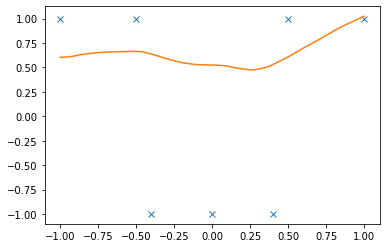

In [47]:
    torch.manual_seed(0)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, NNN,num_classes).to(device)
    plot_training(model)

## N variation 

In [69]:
linelist=[]
abclist=[]
trajlist=[]
N=[50000]

for n in N:
    for seed in range(100):
        gamma=(NNN/n)**(1/4)
        line,abc,traj=modify_init(hidden_size1=n,learning_rate=0.001,epoch=50000,dev=100,gamma=gamma,init_seed=seed)
        #linelist.append(line)
        #abclist.append(abc)
        trajlist.append(traj)

50000


0 10
100 0.9685647487640381
200 0.943795919418335
300 0.9113977551460266
400 0.8724282383918762
500 0.8327732682228088
600 0.7990084290504456
700 0.7731346487998962
800 0.7556944489479065
900 0.7412109971046448
1000 0.7266541123390198
1100 0.7118432521820068
1200 0.6970890760421753
1300 0.682793915271759
1400 0.6693313121795654
1500 0.657027006149292
1600 0.6461271643638611
1700 0.6370350122451782
1800 0.6303486227989197
1900 0.6261905431747437
2000 0.6239955425262451
2100 0.6228187084197998
2200 0.6222764849662781
2300 0.622008204460144
2400 0.6218361258506775
2500 0.6218492388725281
2600 0.6217286586761475
2700 0.6217315793037415
2800 0.6217719912528992
2900 0.6217041015625
3000 0.6217581033706665
3100 0.6217163801193237
3200 0.6217266321182251
3300 0.6217278242111206
3400 0.6217278838157654
3500 0.6217155456542969
3600 0.6217425465583801
3700 0.6217929720878601
3800 0.6217387914657593
3900 0.6217173337936401
4000 0.6217483878135681
4100 0.6217641830444336
4200 0.6217087507247925
430

KeyboardInterrupt: ignored

In [66]:
np.save('/content/drive/My Drive/LCNN/n50000.npy', trajlist)

In [42]:
trajlist=np.load('/content/drive/My Drive/LCNN/n50.npy',allow_pickle=True)

In [57]:
np.save('/content/drive/My Drive/LCNN/n50.npy', trajlist)

In [ ]:
np.save('/content/drive/My Drive/LCNN/n50.npy', trajlist)

In [67]:
node_number=100
listx=np.zeros([100,node_number])
listy=np.zeros([100,node_number])
for i in range(100):
    k=1.0*(len(trajlist[i])/node_number)
    for j in range(node_number):
        index=int(j*k)
        listx[i][j]=trajlist[i][index][0]
        listy[i][j]=trajlist[i][index][1]

        
        

In [41]:
listx1=listx
listy1=listy

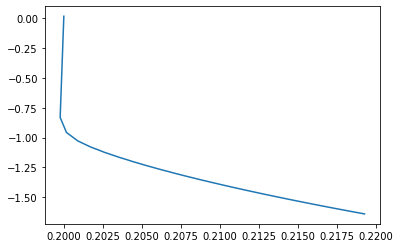

In [68]:
plt.plot(np.mean(listx,axis=0),np.mean(listy,axis=0))

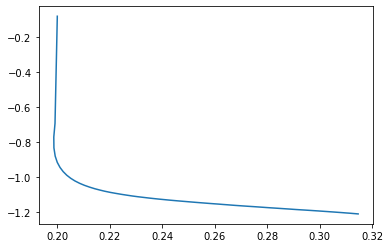

In [64]:
plt.plot(np.mean(listx,axis=0),np.mean(listy,axis=0))

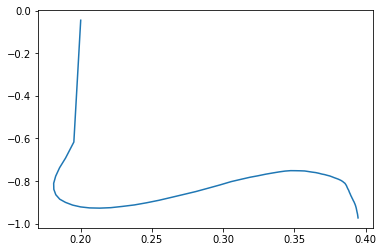

In [59]:
plt.plot(np.mean(listx,axis=0),np.mean(listy,axis=0))

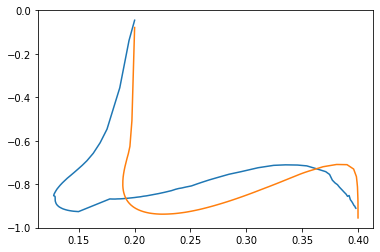

In [44]:
plt.plot(np.mean(listx,axis=0),np.mean(listy,axis=0))
plt.plot(np.mean(listx1,axis=0),np.mean(listy1,axis=0))

In [9]:
linelist=[]
abclist=[]
trajlist=[]
N=[50,500,5000,50000]
for n in N:
    gamma=(NNN/n)**(1/4)
    line,abc,traj=modify_init(hidden_size1=n,learning_rate=0.0005,epoch=50000,dev=100,gamma=gamma)
    linelist.append(line)
    abclist.append(abc)
    trajlist.append(traj)


50


0 10
200 0.5449091196060181
400 0.48636606335639954
600 0.47126105427742004
800 0.46462348103523254
1000 0.46003273129463196
1200 0.45606857538223267
1400 0.4524429142475128
1600 0.4490741193294525
1800 0.44589078426361084
2000 0.44285067915916443


KeyboardInterrupt: ignored

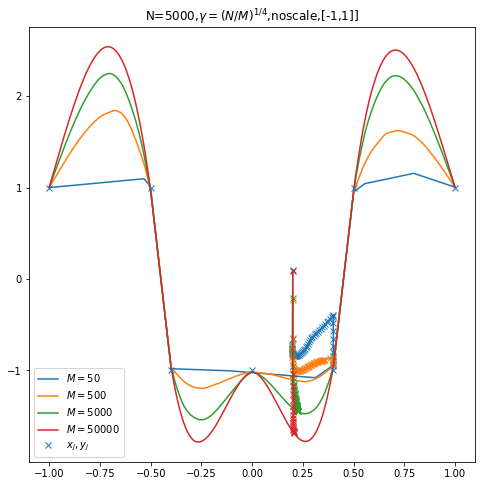

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for i in range(len(N)):
    plt.plot(linelist[i][0],linelist[i][1],label=r'$M=$'+str(N[i]),color=c[i])
    traj=torch.tensor(trajlist[i]).cpu()
    plt.plot(traj[:,0],traj[:,1],'x-',color=c[i])
plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')

plt.legend()
plt.title(r'N=5000,$\gamma=(N/M)^{1/4}$,noscale,[-1,1]]')
#plt.savefig('/content/drive/My Drive/LCNN/newplots/1over4.pdf')